In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import load_digits

In [2]:
# KERAS DOCUMENTATION TO ENSURE REPRODUCIBLE RESULTS
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

In [3]:
X, y = load_digits(return_X_y=True)

In [4]:
X[1]/255

array([0.        , 0.        , 0.        , 0.04705882, 0.05098039,
       0.01960784, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04313725, 0.0627451 , 0.03529412, 0.        ,
       0.        , 0.        , 0.        , 0.01176471, 0.05882353,
       0.0627451 , 0.02352941, 0.        , 0.        , 0.        ,
       0.02745098, 0.05882353, 0.0627451 , 0.0627451 , 0.00784314,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.0627451 , 0.0627451 , 0.01176471, 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.0627451 , 0.0627451 ,
       0.02352941, 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.0627451 , 0.0627451 , 0.02352941, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04313725,
       0.0627451 , 0.03921569, 0.        , 0.        ])

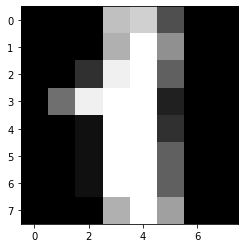

In [5]:
plt.imshow(X[1].reshape(8,8)/255, cmap='gray')

In [6]:
y[0]

0

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1234, train_size=0.8)

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
model = Sequential([
                Dense(4, input_shape=(64,), activation='sigmoid'),
                #Dense(4, activation='relu'),
                Dense(10, activation='softmax') # 0-9 digits (10 classes). With softmax we calculate class probabilities
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 260       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


#### Compile model 

In [12]:
model.compile(
            loss='sparse_categorical_crossentropy' # loss function for multi-class classification
            , metrics = ['accuracy'] 
             )

In [13]:
history = model.fit(X_train,y_train, epochs=50, validation_split = 0.1)

Epoch 1/50
41/41 [==============================] - 0s 4ms/step - loss: 2.3796 - accuracy: 0.1029 - val_loss: 2.3160 - val_accuracy: 0.1319
Epoch 2/50
41/41 [==============================] - 0s 1ms/step - loss: 2.3146 - accuracy: 0.1493 - val_loss: 2.2830 - val_accuracy: 0.1250
Epoch 3/50
41/41 [==============================] - 0s 1ms/step - loss: 2.2790 - accuracy: 0.1585 - val_loss: 2.2542 - val_accuracy: 0.1667
Epoch 4/50
41/41 [==============================] - 0s 1ms/step - loss: 2.2473 - accuracy: 0.1585 - val_loss: 2.2264 - val_accuracy: 0.1528
Epoch 5/50
41/41 [==============================] - 0s 1ms/step - loss: 2.2115 - accuracy: 0.1740 - val_loss: 2.1953 - val_accuracy: 0.2083
Epoch 6/50
41/41 [==============================] - 0s 1ms/step - loss: 2.1644 - accuracy: 0.2776 - val_loss: 2.1157 - val_accuracy: 0.3403
Epoch 7/50
41/41 [==============================] - 0s 1ms/step - loss: 2.1167 - accuracy: 0.3411 - val_loss: 2.0790 - val_accuracy: 0.3611
Epoch 8/50
41/41 [==

In [41]:
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Val accuracy')
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')

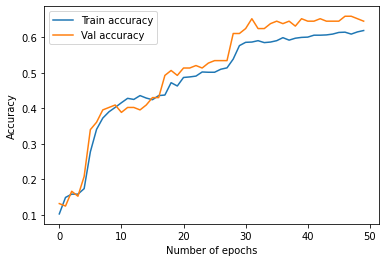

In [42]:
plot_learning_curve(history)

In [15]:
np.argmax(model.predict(X_test)[0])

7

In [16]:
y_test[0]

7

<BarContainer object of 10 artists>

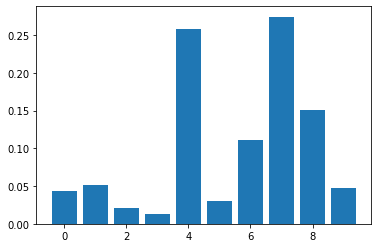

In [17]:
plt.bar(x=[0,1,2,3,4,5,6,7,8,9], height=model.predict(X_test)[0])

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
y_probas = model.predict(X_test)
y_preds = np.argmax(y_probas, axis=1)

In [20]:
confusion_matrix(y_test, y_preds)

array([[25,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0, 32,  4,  0,  0,  0,  0,  2,  1,  1],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0, 32,  0,  0,  1,  0,  0,  0],
       [ 0,  3,  0,  0,  1,  0,  5, 35,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  2,  0,  1,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0, 28,  0,  2],
       [ 0, 20,  1,  3,  2,  0,  1,  3,  0,  2],
       [ 2,  0,  0,  6,  0,  0,  0,  1,  0, 25]], dtype=int64)

## Convolutional Neural Networks

In [47]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten

In [59]:
cnn_model = Sequential([
    Conv2D(filters=4, kernel_size=3, input_shape=(8,8,1)) #input_shape: (width, height, depth)
    , MaxPool2D(pool_size=2)
    , Flatten()
    #, Dropout(0.2) # Helpful in case of overfitting
    , Dense(10, activation='softmax') # Predict probabilities
])

In [60]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 6, 6, 4)           40        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 4)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                370       
Total params: 410
Trainable params: 410
Non-trainable params: 0
_________________________________________________________________


In [61]:
cnn_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
X_train_cnn = X_train.reshape(-1,8,8,1)

In [63]:
X_train_cnn.shape

(1437, 8, 8, 1)

In [64]:
X_train.shape

(1437, 64)

In [65]:
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
41/41 [==============================] - 1s 9ms/step - loss: 5.8322 - accuracy: 0.1817 - val_loss: 4.5880 - val_accuracy: 0.1458
Epoch 2/20
41/41 [==============================] - 0s 5ms/step - loss: 3.3222 - accuracy: 0.2266 - val_loss: 2.8296 - val_accuracy: 0.2014
Epoch 3/20
41/41 [==============================] - 0s 6ms/step - loss: 2.1918 - accuracy: 0.3465 - val_loss: 1.9227 - val_accuracy: 0.4306
Epoch 4/20
41/41 [==============================] - 0s 6ms/step - loss: 1.5729 - accuracy: 0.4888 - val_loss: 1.3581 - val_accuracy: 0.5069
Epoch 5/20
41/41 [==============================] - 0s 6ms/step - loss: 1.1692 - accuracy: 0.5909 - val_loss: 0.9784 - val_accuracy: 0.6458
Epoch 6/20
41/41 [==============================] - 0s 5ms/step - loss: 0.8790 - accuracy: 0.6945 - val_loss: 0.6919 - val_accuracy: 0.7639
Epoch 7/20
41/41 [==============================] - 0s 5ms/step - loss: 0.6710 - accuracy: 0.7827 - val_loss: 0.5134 - val_accuracy: 0.8542
Epoch 8/20
41/41 [==

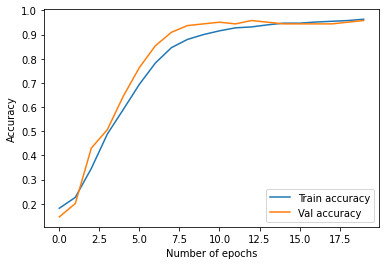

In [66]:
plot_learning_curve(cnn_history)

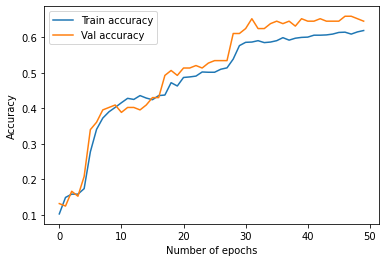

In [44]:
plot_learning_curve(history)

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 260       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


In [46]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 4)           40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                370       
Total params: 410
Trainable params: 410
Non-trainable params: 0
_________________________________________________________________
